# Préparation des donnés

Faire un tableau de best prediction de tous les descritpteurs par rapport a celle bien predite par le random

In [1]:
# Import numerical libraries.  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score

#Librairies
import time
import torch
import random

#Raccourcis utilisé
from tqdm import tqdm_notebook
import torch.nn as nn
import torch.utils.data as data_utils
import pandas as pd


import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adamax, Nadam
from sklearn.model_selection import train_test_split
from math import exp
from itertools import cycle

Using TensorFlow backend.


In [2]:
dfX = pd.read_csv('Molecular Dataset Dream 1.csv',sep=';')
dfY = pd.read_csv('Senteur Dataset Dream 1.csv',sep=';')

In [3]:
df = dfX.merge(dfY)
df

,Unnamed: 0,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,0,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,126,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,...,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29116,29334,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
29117,29335,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
29118,29336,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29119,29337,16220109,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,...,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


On remarque que la colonne 'Unnamed 0' qui sert à marger les 2 dataframe est complètement fausser. 
On se retrouve donc à prédire la classe 'INTENSITY/STRENGTH' avec les mauvais descripteurs.

In [4]:
list_labelY = ['subject','INTENSITY/STRENGTH']
list_label = ['INTENSITY/STRENGTH', 'VALENCE/PLEASANTNESS', 'BAKERY', 'SWEET',
       'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT', 'ACID',
       'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD',
       'GRASS', 'FLOWER', 'CHEMICAL']

In [5]:
dfY = df[list_labelY]
dfX = df
dfX = dfX.drop(list_label,axis=1)
dfX = dfX.drop('Unnamed: 0',axis=1)
dfX = dfX.drop('CID',axis=1)

In [6]:
dfX

,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,Mp,...,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50,Compound Identifier,Intensity,Dilution,subject
0,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,0,1,1
1,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,1,0,1
2,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,0,1,2
3,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,1,0,2
4,4.532,4.961,2.011,2.155,2.482,2.168,2.554,0.873,1.006,0.879,...,0,0,0,0,0,0,126,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29116,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,6114390,1,1,38
29117,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,6114390,0,2,39
29118,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,6114390,1,1,39
29119,5.867,5.670,1.804,2.579,3.128,2.657,3.275,0.821,0.995,0.845,...,1,0,1,0,1,0,6114390,0,2,40


##  Réseau Neuronal Pytorch

In [7]:
dfY=dfY.drop('subject',axis=1)

In [8]:
def to_class(y_):
    res = np.zeros((len(y_), 11), dtype='q')
    for i in range(len(y_)):
        res[i][int(y_[i])] = 1
    return res

In [9]:
dataX = np.float32(dfX.values)
dataY = np.longlong(dfY.values)
dataY = to_class(dataY)

In [10]:
# Normalisation
sc = StandardScaler()
dataX = sc.fit_transform(dataX)

In [11]:
DATA_Train, DATA_Test, TARGET_Train, TARGET_Test = train_test_split(dataX, dataY ,test_size=0.2)

In [12]:
## PyTorch is used to working with batches.
Batch=300

X_train_tensor = torch.from_numpy(DATA_Train)
Y_train_tensor = torch.from_numpy(TARGET_Train) 

X_test_tensor = torch.from_numpy(DATA_Test)
Y_test_tensor = torch.from_numpy(TARGET_Test)

train = data_utils.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = data_utils.DataLoader(train, batch_size=Batch, shuffle=True)

test = data_utils.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = data_utils.DataLoader(test, batch_size=Batch, shuffle=True)

In [14]:
X_train_tensor.shape

torch.Size([23296, 3083])

In [13]:
class MyNetwork(nn.Module):

    def __init__(self):
        super(MyNetwork, self).__init__()
        
        ## Activation layer
        self.relu = nn.ReLU()
        
        self.fc1 = nn.Linear(in_features = 3083, out_features = 2400)
        self.fc2 = nn.Linear(2400, 1200)  
        self.fc3 = nn.Linear(1200, 600)
        self.output = nn.Linear(600, 11)
        self.softmax = nn.LogSoftmax(dim=1)
        self.dr = nn.Dropout(0.3)
        
    def forward(self, x):

    ## First full connection
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dr(x)
    
    ## Second full connection
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dr(x)
        
    ## Third full connection
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dr(x)
        
    ## Output layer
        x = self.output(x)
        y = self.softmax(x)
        
        return y

In [15]:
## Create an instance of our network
net = MyNetwork()

In [28]:
net = MyNetwork()
net = net.cuda()

LEARNING_RATE = 0.003
MOMENTUM = 0.9

criterion = nn.NLLLoss()
#criterion = nn.CrossEntropyLoss

# Méthode stochastique de descente du grandient 
optimizer = torch.optim.SGD(net.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM)

In [29]:
## Nombre d'époque d'apprentissage
N_EPOCHS = 30

epoch_loss, epoch_acc, epoch_val_loss, epoch_val_acc = [], [], [], []
start_time = time.time()

for e in range(N_EPOCHS):
  
    print("EPOCH:",e)

    ### boucle d'entraineement
    running_loss = 0
    running_accuracy = 0
    running_acc=0
    start_epoch_time=time.time()

    ## Le réseau est mis en mode "entrainement"
    net.train()

    for i, batch in enumerate(tqdm_notebook(train_loader)):
    
        # Obtenir batch du dataloader
        x = batch[0]
        labels = batch[1]

        # déplacer le batch sur le GPU
        x = x.cuda()
        labels = labels.cuda()

        # Calcul de l'output et les loss
        output = net(x)
        y = output
        
        loss = criterion(y, torch.max(labels, 1)[1])

        # Réinitialisation du gradients
        optimizer.zero_grad()

        # Calculs du gradients
        loss.backward()

        # Appliquecation d'une étape d'optimisation de l'algorithme de descente pour mettre à jour les poids
        optimizer.step()

        with torch.no_grad():
            running_loss += loss.item()            
            running_accuracy += (y.max(1)[1] == torch.max(labels, 1)[1]).sum().item()

    print("Training accuracy:", running_accuracy/float(len(train)),
        "Training loss:", running_loss/float(len(train)))

    epoch_loss.append(running_loss/len(train))
    epoch_acc.append(running_accuracy/len(train))

    ### Boucle de valisation
    ## Le réseau est mis en mode validation
    net.eval()

    running_val_loss = 0
    running_val_accuracy = 0

    for i, batch in enumerate(tqdm_notebook(test_loader)):
    
        with torch.no_grad():
            
            x = batch[0]
            labels = batch[1]
            
            x = x.cuda()
            labels = labels.cuda()
            
            output = net(x)
            y = output

            loss = criterion(y, torch.max(labels, 1)[1])

            running_val_loss += loss.item()
            running_val_accuracy += (y.max(1)[1] == torch.max(labels, 1)[1]).sum().item()
    
    print("Validation accuracy:", running_val_accuracy/float(len(test)),
        "Validation loss:", running_val_loss/float(len(test)))

    epoch_val_loss.append(running_val_loss/len(test))
    epoch_val_acc.append(running_val_accuracy/len(test))
    
    inter = time.time() - start_epoch_time  
    print ('Temps de l Epoch ',e,' en secondes:', inter )
    

interval = time.time() - start_time  
print ('Temps total en secondes:', interval )



EPOCH: 0


C:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Training accuracy: 0.15235750804771825 Training loss: 0.007940934287217321


C:\Users\benja\anaconda3\lib\site-packages\ipykernel_launcher.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



Validation accuracy: 0.15098841172460806 Validation loss: 0.007931009067023133
Temps de l Epoch  0  en secondes: 2.5887272357940674
EPOCH: 1



Training accuracy: 0.16114372277977657 Training loss: 0.00782870617898841



Validation accuracy: 0.15030674846625766 Validation loss: 0.007873176065690678
Temps de l Epoch  1  en secondes: 2.5410923957824707
EPOCH: 2



Training accuracy: 0.16481726945654232 Training loss: 0.007779143818669463



Validation accuracy: 0.1547375596455351 Validation loss: 0.007845399163577047
Temps de l Epoch  2  en secondes: 2.5519158840179443
EPOCH: 3



Training accuracy: 0.16837720128763492 Training loss: 0.007739893962569003



Validation accuracy: 0.15644171779141106 Validation loss: 0.007813923848106004
Temps de l Epoch  3  en secondes: 2.5379388332366943
EPOCH: 4



Training accuracy: 0.17504260556712745 Training loss: 0.007714211825641848



Validation accuracy: 0.1605316973415133 Validation loss: 0.007781082542070988
Temps de l Epoch  4  en secondes: 2.5391345024108887
EPOCH: 5



Training accuracy: 0.18026888846809316 Training loss: 0.007679908362736961



Validation accuracy: 0.16223585548738922 Validation loss: 0.007751966140346618
Temps de l Epoch  5  en secondes: 2.5212619304656982
EPOCH: 6



Training accuracy: 0.182200340844537 Training loss: 0.007624404680049458



Validation accuracy: 0.1683708248125426 Validation loss: 0.007706771355221364
Temps de l Epoch  6  en secondes: 2.5297622680664062
EPOCH: 7



Training accuracy: 0.1907971975004734 Training loss: 0.007577474937590657



Validation accuracy: 0.17893660531697342 Validation loss: 0.00766405071136329
Temps de l Epoch  7  en secondes: 2.590413808822632
EPOCH: 8



Training accuracy: 0.1940162847945465 Training loss: 0.007500519542119829



Validation accuracy: 0.18882072256305385 Validation loss: 0.007593158076389679
Temps de l Epoch  8  en secondes: 2.5320539474487305
EPOCH: 9



Training accuracy: 0.2010982768415073 Training loss: 0.007432901550030036



Validation accuracy: 0.19768234492160872 Validation loss: 0.00749839473599549
Temps de l Epoch  9  en secondes: 2.548590660095215
EPOCH: 10



Training accuracy: 0.21086915356939973 Training loss: 0.007371898303314538



Validation accuracy: 0.2010906612133606 Validation loss: 0.007422475970839674
Temps de l Epoch  10  en secondes: 2.5030951499938965
EPOCH: 11



Training accuracy: 0.21677712554440448 Training loss: 0.007307380782092888



Validation accuracy: 0.20824812542603954 Validation loss: 0.0073685957285199105
Temps de l Epoch  11  en secondes: 2.551297187805176
EPOCH: 12



Training accuracy: 0.21859496307517515 Training loss: 0.007282073559622899



Validation accuracy: 0.20483980913428765 Validation loss: 0.007405849809783124
Temps de l Epoch  12  en secondes: 2.529735803604126
EPOCH: 13



Training accuracy: 0.21745881461844346 Training loss: 0.007286426926670461



Validation accuracy: 0.2147239263803681 Validation loss: 0.007327693859248561
Temps de l Epoch  13  en secondes: 2.5341861248016357
EPOCH: 14



Training accuracy: 0.22041280060594584 Training loss: 0.0072595276224908896



Validation accuracy: 0.2143830947511929 Validation loss: 0.007378343749225099
Temps de l Epoch  14  en secondes: 2.5245394706726074
EPOCH: 15



Training accuracy: 0.2231016852868775 Training loss: 0.007232660823779403



Validation accuracy: 0.21267893660531698 Validation loss: 0.007331209111229936
Temps de l Epoch  15  en secondes: 2.5221519470214844
EPOCH: 16



Training accuracy: 0.22283658398030676 Training loss: 0.007192403541959341



Validation accuracy: 0.21847307430129517 Validation loss: 0.007306056113655907
Temps de l Epoch  16  en secondes: 2.5265963077545166
EPOCH: 17



Training accuracy: 0.2259041848134823 Training loss: 0.007203526506819434



Validation accuracy: 0.2174505794137696 Validation loss: 0.007314512009675924
Temps de l Epoch  17  en secondes: 2.5399179458618164
EPOCH: 18



Training accuracy: 0.2266237455027457 Training loss: 0.0071917305117280075



Validation accuracy: 0.21063394683026584 Validation loss: 0.007390164077566364
Temps de l Epoch  18  en secondes: 2.597059965133667
EPOCH: 19



Training accuracy: 0.22438932020450672 Training loss: 0.007226787636483671



Validation accuracy: 0.21540558963871848 Validation loss: 0.007290182019385173
Temps de l Epoch  19  en secondes: 2.5386738777160645
EPOCH: 20



Training accuracy: 0.22609354288960423 Training loss: 0.007188589937238615



Validation accuracy: 0.21574642126789367 Validation loss: 0.007313553866026916
Temps de l Epoch  20  en secondes: 2.547089099884033
EPOCH: 21



Training accuracy: 0.22719181973111152 Training loss: 0.007165284676886805



Validation accuracy: 0.2174505794137696 Validation loss: 0.007294921380935596
Temps de l Epoch  21  en secondes: 2.643702745437622
EPOCH: 22



Training accuracy: 0.2256012118916872 Training loss: 0.007160017964876504



Validation accuracy: 0.21642808452624404 Validation loss: 0.007296530259411272
Temps de l Epoch  22  en secondes: 2.541715145111084
EPOCH: 23



Training accuracy: 0.22722969134633592 Training loss: 0.007157581625867806



Validation accuracy: 0.21813224267211997 Validation loss: 0.007294639406678786
Temps de l Epoch  23  en secondes: 2.5257325172424316
EPOCH: 24



Training accuracy: 0.23063813671653097 Training loss: 0.007138852706530672



Validation accuracy: 0.2174505794137696 Validation loss: 0.007340827765071481
Temps de l Epoch  24  en secondes: 2.5878517627716064
EPOCH: 25



Training accuracy: 0.22791138042037493 Training loss: 0.007177130197670576



Validation accuracy: 0.22324471710974778 Validation loss: 0.007288526497329265
Temps de l Epoch  25  en secondes: 2.5872442722320557
EPOCH: 26



Training accuracy: 0.22995644764249196 Training loss: 0.007154583086729998



Validation accuracy: 0.2143830947511929 Validation loss: 0.0073464127243499655
Temps de l Epoch  26  en secondes: 2.5766711235046387
EPOCH: 27



Training accuracy: 0.23131982579056998 Training loss: 0.00714786326743012



Validation accuracy: 0.2171097477845944 Validation loss: 0.007291705574238471
Temps de l Epoch  27  en secondes: 2.5535123348236084
EPOCH: 28



Training accuracy: 0.23154705548191631 Training loss: 0.007146435988443725



Validation accuracy: 0.21540558963871848 Validation loss: 0.007329045954251176
Temps de l Epoch  28  en secondes: 2.5762124061584473
EPOCH: 29



Training accuracy: 0.23234235940162848 Training loss: 0.00710915152580985



Validation accuracy: 0.21847307430129517 Validation loss: 0.0072799826773479025
Temps de l Epoch  29  en secondes: 2.551753044128418
EPOCH: 30



Training accuracy: 0.23041090702518463 Training loss: 0.007129052813543873



Validation accuracy: 0.21608725289706884 Validation loss: 0.007299219741249215
Temps de l Epoch  30  en secondes: 2.5587356090545654
EPOCH: 31



Training accuracy: 0.23336489301268698 Training loss: 0.007149223269126876



Validation accuracy: 0.2147239263803681 Validation loss: 0.00728824557946016
Temps de l Epoch  31  en secondes: 2.5561232566833496
EPOCH: 32



Training accuracy: 0.22965347472069683 Training loss: 0.007143312258107309



Validation accuracy: 0.21813224267211997 Validation loss: 0.007294321352718798
Temps de l Epoch  32  en secondes: 2.5567502975463867
EPOCH: 33



Training accuracy: 0.23003219087294072 Training loss: 0.007130523162275479



Validation accuracy: 0.21506475800954328 Validation loss: 0.007309817747754472
Temps de l Epoch  33  en secondes: 2.5450387001037598
EPOCH: 34



Training accuracy: 0.2329104336299943 Training loss: 0.007116132422708874



Validation accuracy: 0.21370143149284254 Validation loss: 0.007299703485557801
Temps de l Epoch  34  en secondes: 2.554866313934326
EPOCH: 35



Training accuracy: 0.2337436091649309 Training loss: 0.007155169404110568



Validation accuracy: 0.21506475800954328 Validation loss: 0.00728927555747315
Temps de l Epoch  35  en secondes: 2.6334877014160156
EPOCH: 36



Training accuracy: 0.23272107555387236 Training loss: 0.007098832425690131



Validation accuracy: 0.2140422631220177 Validation loss: 0.007327844516387502
Temps de l Epoch  36  en secondes: 2.5551867485046387
EPOCH: 37



Training accuracy: 0.23431168339329672 Training loss: 0.007108246212406516



Validation accuracy: 0.21813224267211997 Validation loss: 0.007306795747571034
Temps de l Epoch  37  en secondes: 2.5127601623535156
EPOCH: 38



Training accuracy: 0.23313766332134064 Training loss: 0.007119580918788639



Validation accuracy: 0.21779141104294478 Validation loss: 0.00729199876245708
Temps de l Epoch  38  en secondes: 2.534660816192627
EPOCH: 39



Training accuracy: 0.2337057375497065 Training loss: 0.00709190449916014



Validation accuracy: 0.2229038854805726 Validation loss: 0.00728558941446524
Temps de l Epoch  39  en secondes: 2.5851938724517822
EPOCH: 40



Training accuracy: 0.23453891308464306 Training loss: 0.007111522226346259



Validation accuracy: 0.2229038854805726 Validation loss: 0.007281745057083265
Temps de l Epoch  40  en secondes: 2.5499651432037354
EPOCH: 41



Training accuracy: 0.23753077068736983 Training loss: 0.0071105321459055985



Validation accuracy: 0.21370143149284254 Validation loss: 0.007324551674648459
Temps de l Epoch  41  en secondes: 2.544832706451416
EPOCH: 42



Training accuracy: 0.23612952092406742 Training loss: 0.0070992146719362085



Validation accuracy: 0.21813224267211997 Validation loss: 0.007324875254328753
Temps de l Epoch  42  en secondes: 2.513051748275757
EPOCH: 43



Training accuracy: 0.23529634538913086 Training loss: 0.007110549911046836



Validation accuracy: 0.2147239263803681 Validation loss: 0.0072971241930836145
Temps de l Epoch  43  en secondes: 2.5924601554870605
EPOCH: 44



Training accuracy: 0.2344252982389699 Training loss: 0.007092783058757381



Validation accuracy: 0.21847307430129517 Validation loss: 0.007297056665531047
Temps de l Epoch  44  en secondes: 2.5291824340820312
EPOCH: 45



Training accuracy: 0.23487975762166258 Training loss: 0.007090644659451566



Validation accuracy: 0.21915473755964554 Validation loss: 0.007301647970281495
Temps de l Epoch  45  en secondes: 2.605595588684082
EPOCH: 46



Training accuracy: 0.2347661427759894 Training loss: 0.007100770491990283



Validation accuracy: 0.21847307430129517 Validation loss: 0.007278848523255018
Temps de l Epoch  46  en secondes: 2.5477311611175537
EPOCH: 47



Training accuracy: 0.23457678469986745 Training loss: 0.007084029381348765



Validation accuracy: 0.2143830947511929 Validation loss: 0.00729868919083921
Temps de l Epoch  47  en secondes: 2.578101396560669
EPOCH: 48



Training accuracy: 0.2375686423025942 Training loss: 0.007074328088281823



Validation accuracy: 0.2113156100886162 Validation loss: 0.0073007145298526815
Temps de l Epoch  48  en secondes: 2.5578081607818604
EPOCH: 49



Training accuracy: 0.23851543268320394 Training loss: 0.007077948782078765



Validation accuracy: 0.2171097477845944 Validation loss: 0.007291695091622008
Temps de l Epoch  49  en secondes: 2.6873552799224854
EPOCH: 50



Training accuracy: 0.2379473584548381 Training loss: 0.007082093608489973



Validation accuracy: 0.2201772324471711 Validation loss: 0.007291837703962268
Temps de l Epoch  50  en secondes: 2.5668530464172363
EPOCH: 51



Training accuracy: 0.23609164930884302 Training loss: 0.007075764685502401



Validation accuracy: 0.2092706203135651 Validation loss: 0.007313137649270898
Temps de l Epoch  51  en secondes: 2.5729172229766846
EPOCH: 52



Training accuracy: 0.23859117591365273 Training loss: 0.007082860376364895



Validation accuracy: 0.21847307430129517 Validation loss: 0.0073040241925344225
Temps de l Epoch  52  en secondes: 2.565416097640991
EPOCH: 53



Training accuracy: 0.23889414883544782 Training loss: 0.007065100616587989



Validation accuracy: 0.22154055896387184 Validation loss: 0.007288093703412327
Temps de l Epoch  53  en secondes: 2.5597150325775146
EPOCH: 54



Training accuracy: 0.24090134444234046 Training loss: 0.007073321732533879



Validation accuracy: 0.2143830947511929 Validation loss: 0.0073114002977980996
Temps de l Epoch  54  en secondes: 2.513664484024048
EPOCH: 55



Training accuracy: 0.23965158113993562 Training loss: 0.007062842195355921



Validation accuracy: 0.21540558963871848 Validation loss: 0.007312547859888785
Temps de l Epoch  55  en secondes: 2.5649795532226562
EPOCH: 56



Training accuracy: 0.23859117591365273 Training loss: 0.0070593286115909655



Validation accuracy: 0.21847307430129517 Validation loss: 0.007296021080537157
Temps de l Epoch  56  en secondes: 2.546550989151001
EPOCH: 57



Training accuracy: 0.2389698920658966 Training loss: 0.00707860301331439



Validation accuracy: 0.21540558963871848 Validation loss: 0.007304132837946917
Temps de l Epoch  57  en secondes: 2.563795566558838
EPOCH: 58



Training accuracy: 0.23772012876349177 Training loss: 0.007073918799292159



Validation accuracy: 0.21029311520109067 Validation loss: 0.007315445937668294
Temps de l Epoch  58  en secondes: 2.553521156311035
EPOCH: 59



Training accuracy: 0.23772012876349177 Training loss: 0.007070997767637138



Validation accuracy: 0.2171097477845944 Validation loss: 0.0073079064173526154
Temps de l Epoch  59  en secondes: 2.5405638217926025
EPOCH: 60



Training accuracy: 0.2383639462223064 Training loss: 0.007063367763628361



Validation accuracy: 0.22154055896387184 Validation loss: 0.007307771768550444
Temps de l Epoch  60  en secondes: 2.542037010192871
EPOCH: 61



Training accuracy: 0.23688695322855519 Training loss: 0.007089035097023593



Validation accuracy: 0.22085889570552147 Validation loss: 0.007315805515791172
Temps de l Epoch  61  en secondes: 2.603693962097168
EPOCH: 62



Training accuracy: 0.2390456352963454 Training loss: 0.007060900106504094



Validation accuracy: 0.22119972733469667 Validation loss: 0.007316255943256735
Temps de l Epoch  62  en secondes: 2.547607183456421
EPOCH: 63



Training accuracy: 0.24067411475099412 Training loss: 0.007036895454889264



Validation accuracy: 0.2167689161554192 Validation loss: 0.007309605738868011
Temps de l Epoch  63  en secondes: 2.6518795490264893
EPOCH: 64



Training accuracy: 0.24021965536830145 Training loss: 0.007035794932606139



Validation accuracy: 0.21608725289706884 Validation loss: 0.007323995120848777
Temps de l Epoch  64  en secondes: 2.5448436737060547
EPOCH: 65



Training accuracy: 0.24029539859875024 Training loss: 0.007028661129082317



Validation accuracy: 0.21370143149284254 Validation loss: 0.007330105673641109
Temps de l Epoch  65  en secondes: 2.518012523651123
EPOCH: 66



Training accuracy: 0.24249195228176482 Training loss: 0.007046801667844588



Validation accuracy: 0.2140422631220177 Validation loss: 0.007334388919484477
Temps de l Epoch  66  en secondes: 2.496385335922241
EPOCH: 67



Training accuracy: 0.24449914788865745 Training loss: 0.007017979651683886



Validation accuracy: 0.20824812542603954 Validation loss: 0.007348154138852401
Temps de l Epoch  67  en secondes: 2.509192943572998
EPOCH: 68



Training accuracy: 0.24105283090323804 Training loss: 0.0070346231104817



Validation accuracy: 0.2140422631220177 Validation loss: 0.007334503659441427
Temps de l Epoch  68  en secondes: 2.505411148071289
EPOCH: 69



Training accuracy: 0.2400302972921795 Training loss: 0.007044042572111055



Validation accuracy: 0.21574642126789367 Validation loss: 0.007322251024746781
Temps de l Epoch  69  en secondes: 2.532411813735962
EPOCH: 70



Training accuracy: 0.241923878053399 Training loss: 0.007028816442014683



Validation accuracy: 0.21506475800954328 Validation loss: 0.007326106514829962
Temps de l Epoch  70  en secondes: 2.509171962738037
EPOCH: 71



Training accuracy: 0.2418102632077258 Training loss: 0.007037007964440671



Validation accuracy: 0.21779141104294478 Validation loss: 0.007326895798967253
Temps de l Epoch  71  en secondes: 2.5250961780548096
EPOCH: 72



Training accuracy: 0.24067411475099412 Training loss: 0.007051525877136508



Validation accuracy: 0.20995228357191548 Validation loss: 0.007332965965244993
Temps de l Epoch  72  en secondes: 2.523070812225342
EPOCH: 73



Training accuracy: 0.2436281007384965 Training loss: 0.007019404921651767



Validation accuracy: 0.2140422631220177 Validation loss: 0.0073233729897507534
Temps de l Epoch  73  en secondes: 2.5046842098236084
EPOCH: 74



Training accuracy: 0.24336299943192577 Training loss: 0.007024049158462903



Validation accuracy: 0.21336059986366734 Validation loss: 0.007333053157861004
Temps de l Epoch  74  en secondes: 2.545928716659546
EPOCH: 75



Training accuracy: 0.24037114182919903 Training loss: 0.007028877231754649



Validation accuracy: 0.21370143149284254 Validation loss: 0.007320349120573682
Temps de l Epoch  75  en secondes: 2.5542633533477783
EPOCH: 76



Training accuracy: 0.24226472259041848 Training loss: 0.007026541889944078



Validation accuracy: 0.20995228357191548 Validation loss: 0.007315690694573629
Temps de l Epoch  76  en secondes: 2.550201177597046
EPOCH: 77



Training accuracy: 0.24552168149971595 Training loss: 0.00700567003859419



Validation accuracy: 0.21779141104294478 Validation loss: 0.0073236338362534514
Temps de l Epoch  77  en secondes: 2.5402872562408447
EPOCH: 78



Training accuracy: 0.2411285741336868 Training loss: 0.007015505624390804



Validation accuracy: 0.21540558963871848 Validation loss: 0.007319867732822285
Temps de l Epoch  78  en secondes: 2.6149394512176514
EPOCH: 79



Training accuracy: 0.2446885059647794 Training loss: 0.007010980863233472



Validation accuracy: 0.2147239263803681 Validation loss: 0.007339217423905137
Temps de l Epoch  79  en secondes: 2.5041348934173584
EPOCH: 80



Training accuracy: 0.24408256012118917 Training loss: 0.007028949443554928



Validation accuracy: 0.21233810497614178 Validation loss: 0.00732489207527145
Temps de l Epoch  80  en secondes: 2.5233442783355713
EPOCH: 81



Training accuracy: 0.24521870857792086 Training loss: 0.007015974606060887



Validation accuracy: 0.2143830947511929 Validation loss: 0.0073358467345182475
Temps de l Epoch  81  en secondes: 2.5065717697143555
EPOCH: 82



Training accuracy: 0.24340087104715016 Training loss: 0.00699860751233844



Validation accuracy: 0.21642808452624404 Validation loss: 0.007334908174672091
Temps de l Epoch  82  en secondes: 2.549806594848633
EPOCH: 83



Training accuracy: 0.24128006059458437 Training loss: 0.007000570120266996



Validation accuracy: 0.2140422631220177 Validation loss: 0.007361423993646977
Temps de l Epoch  83  en secondes: 2.677029848098755
EPOCH: 84



Training accuracy: 0.24317364135580383 Training loss: 0.006990160623343463



Validation accuracy: 0.21336059986366734 Validation loss: 0.007343766716929138
Temps de l Epoch  84  en secondes: 2.565661668777466
EPOCH: 85



Training accuracy: 0.24275705358833555 Training loss: 0.0070134030397903105



Validation accuracy: 0.2085889570552147 Validation loss: 0.007340887329085961
Temps de l Epoch  85  en secondes: 2.5447325706481934
EPOCH: 86



Training accuracy: 0.24453701950388185 Training loss: 0.007013999655083755



Validation accuracy: 0.2116564417177914 Validation loss: 0.007347400528115323
Temps de l Epoch  86  en secondes: 2.569072723388672
EPOCH: 87



Training accuracy: 0.2436659723537209 Training loss: 0.007025090331178884



Validation accuracy: 0.21540558963871848 Validation loss: 0.007369184624035503
Temps de l Epoch  87  en secondes: 2.5855908393859863
EPOCH: 88



Training accuracy: 0.24419617496686233 Training loss: 0.007017825155902871



Validation accuracy: 0.2089297886843899 Validation loss: 0.007355864793976392
Temps de l Epoch  88  en secondes: 2.5576624870300293
EPOCH: 89



Training accuracy: 0.24453701950388185 Training loss: 0.00699693710599472



Validation accuracy: 0.21029311520109067 Validation loss: 0.0073551423873069255
Temps de l Epoch  89  en secondes: 2.51385498046875
EPOCH: 90



Training accuracy: 0.24692293126301837 Training loss: 0.0069998494875835125



Validation accuracy: 0.2089297886843899 Validation loss: 0.007358054848211349
Temps de l Epoch  90  en secondes: 2.5700273513793945
EPOCH: 91



Training accuracy: 0.24688505964779398 Training loss: 0.007002632226530428



Validation accuracy: 0.2062031356509884 Validation loss: 0.007383696790771901
Temps de l Epoch  91  en secondes: 2.6020500659942627
EPOCH: 92



Training accuracy: 0.2429464116644575 Training loss: 0.007019589990631375



Validation accuracy: 0.2062031356509884 Validation loss: 0.007417198907947085
Temps de l Epoch  92  en secondes: 2.674730062484741
EPOCH: 93



Training accuracy: 0.24128006059458437 Training loss: 0.007036291647761005



Validation accuracy: 0.21301976823449217 Validation loss: 0.0073616949977237675
Temps de l Epoch  93  en secondes: 2.5934581756591797
EPOCH: 94



Training accuracy: 0.24499147888657452 Training loss: 0.007006015093167201



Validation accuracy: 0.21267893660531698 Validation loss: 0.007349721980728742
Temps de l Epoch  94  en secondes: 2.5542960166931152
EPOCH: 95



Training accuracy: 0.24457489111910624 Training loss: 0.006991257655803418



Validation accuracy: 0.21574642126789367 Validation loss: 0.00737343520312059
Temps de l Epoch  95  en secondes: 2.555314779281616
EPOCH: 96



Training accuracy: 0.2460897557280818 Training loss: 0.006984338140063294



Validation accuracy: 0.21642808452624404 Validation loss: 0.007353970284517232
Temps de l Epoch  96  en secondes: 2.5542938709259033
EPOCH: 97



Training accuracy: 0.24415830335163793 Training loss: 0.006986394259903021



Validation accuracy: 0.20790729379686435 Validation loss: 0.007369028603697441
Temps de l Epoch  97  en secondes: 2.6157665252685547
EPOCH: 98



Training accuracy: 0.2471501609543647 Training loss: 0.00696763488474815



Validation accuracy: 0.20961145194274028 Validation loss: 0.007363974601131925
Temps de l Epoch  98  en secondes: 2.5601613521575928
EPOCH: 99



Training accuracy: 0.24616549895853057 Training loss: 0.006993560916522849



Validation accuracy: 0.2116564417177914 Validation loss: 0.007361111790449667
Temps de l Epoch  99  en secondes: 2.556743860244751
Temps total en secondes: 255.64685320854187


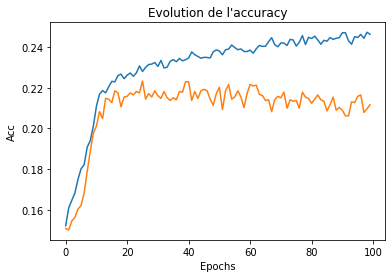

In [30]:
plt.plot(np.arange(0,N_EPOCHS),epoch_acc)
plt.plot(np.arange(0,N_EPOCHS),epoch_val_acc)
plt.title("Evolution de l'accuracy")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.show()

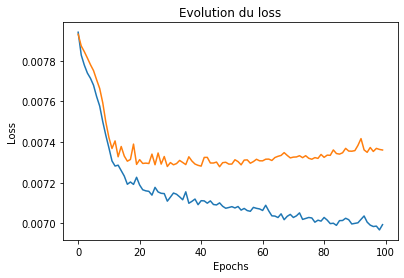

In [31]:
plt.plot(np.arange(0,N_EPOCHS),epoch_loss)
plt.plot(np.arange(0,N_EPOCHS),epoch_val_loss)
plt.title("Evolution du loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# Réseau Neuronal Keras

In [130]:
X_train = dataX #features
Y_train = dataY #labels

In [133]:
x_train,x_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.2)

In [134]:
adam = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

In [135]:
model = Sequential()
model.add(Dense(2400, activation='relu', input_dim=3083))
model.add(Dropout(0.3))
model.add(Dense(1200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(11, activation='softmax'))

In [136]:
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [137]:
history = model.fit(x_train, y_train, epochs=30, batch_size=1000, validation_data=(x_test,y_test), shuffle=True)
model.test_on_batch(x_test, y_test)
model.metrics_names

Train on 23471 samples, validate on 5868 samples
Epoch 1/30
23471/23471 [==============================] - 4s 191us/sample - loss: 3.1467 - acc: 0.1186 - val_loss: 2.3176 - val_acc: 0.1665
Epoch 2/30
23471/23471 [==============================] - 4s 175us/sample - loss: 2.3655 - acc: 0.1438 - val_loss: 2.3038 - val_acc: 0.1610
Epoch 3/30
23471/23471 [==============================] - 4s 183us/sample - loss: 2.3199 - acc: 0.1530 - val_loss: 2.2843 - val_acc: 0.1745
Epoch 4/30
23471/23471 [==============================] - 4s 178us/sample - loss: 2.2941 - acc: 0.1645 - val_loss: 2.2642 - val_acc: 0.1798
Epoch 5/30
23471/23471 [==============================] - 4s 189us/sample - loss: 2.2824 - acc: 0.1653 - val_loss: 2.2519 - val_acc: 0.1873
Epoch 6/30
23471/23471 [==============================] - 4s 185us/sample - loss: 2.2633 - acc: 0.1735 - val_loss: 2.2268 - val_acc: 0.1907
Epoch 7/30
23471/23471 [==============================] - 4s 183us/sample - loss: 2.2451 - acc: 0.1847 - val_lo

['loss', 'acc']

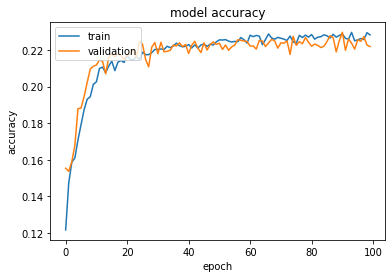

In [95]:
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

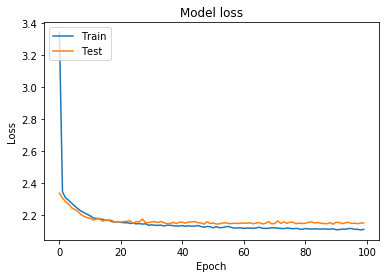

In [96]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [98]:
y_pred = model.predict(x_test)

In [101]:
# Compute ROC curve and ROC area for each class
n_classes = 11
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [102]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

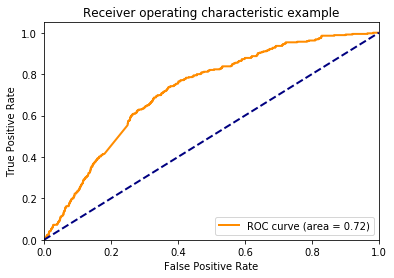

In [103]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


In [105]:
#Unique interpolation
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

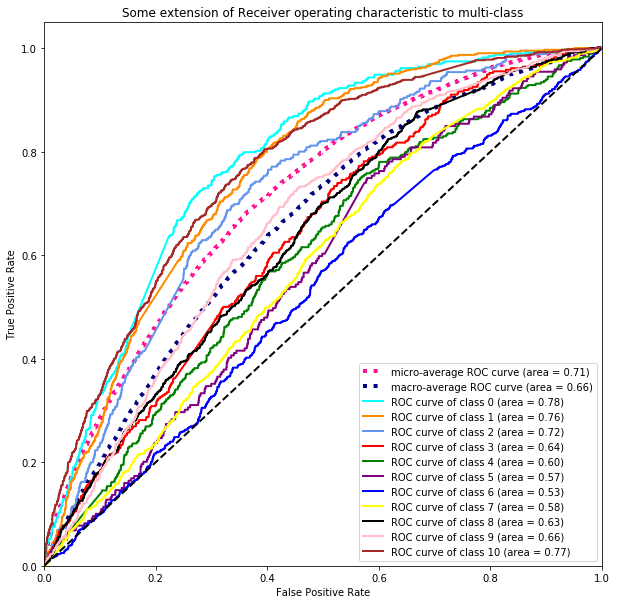

In [106]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'blue', 'yellow', 'black', 'pink', 'brown'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()    